<font size="5">**</h1>LESSON 2. Binary Search Trees, Traversals and Balancing in Python</h1>**</font>

<font size="3">**QUESTION 1:**</font>

As a senior backend engineer at a Company, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:

1. **Insert** the profile information for a new user.
2. **Find** the profile information of a user, given their username.
3. **Update** the profile information of a user, given their username.
4. **List** all the users of the platform, sorted by username.

We can assume that usernames are unique.

<font size="4">**1. State the Problem clearly, Identify the Inputs & Output formats:**</font>

**Problem:**

We need to create some kind of Data Structures that can hold 100 millions records and be able to perform Insert, Update, Find/Search and List operations.

**Inputs:**

1. A User information (username, name and email)

A Python *class* would be a great way to represent the information for a user. A class is a blueprint for creating *objects*. Everything in python is an object belonging to some class. Here's a simplest possible class in python, with nothin in it.

In [6]:
class User:
    pass

In [8]:
# We can create or initiate an object of the class by calling the class name as if it were a function
user1 = User()
user1

In [10]:
type(user1)

__main__.User

The object ```user1``` does not contain any useful information. Let's add a ```constructor method``` to the class to store some *attributes* or *properties*

In [21]:
class User:
    def __init__(self, username, name, email) -> None:
        self.username = username
        self.name = name
        self.email = email 
        print('User created!')

We can now create an object with some properties.

In [22]:
user2 = User('john', 'John Doe', 'john@doe.com')
user2

User created!


In [23]:
print(user2.username)
print(user2.name)
print(user2.email)

john
John Doe
john@doe.com


Here's what is happening above (conceptually)
1. When we invoke the ```User``` class, Python creates an empty object and stores it under ```user2``` variable.
2. Then, Python invokes the ```__init__``` function and passes the object ```user2``` as a self and other arguments that are passed to the class.
3. It is basically calling ```User.__init__``` function and then setting the values to the username, name and email parameters inside the ```__init__``` function.
4. We can access the parameters that are set under the ```__init__``` function directly using the object like ```user2.username``` or ```user2.name``` or ```user2.email```

In [13]:
user2.__init__('john', 'John Doe', 'john@doe.com')    

User created!


We can also define *Custom Method* inside a *class*.

In [28]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email 
    
    def introduce_yourself(self, guest_name):
        print(f'Hi {guest_name}, I am {self.name} my username is {self.username} and my email is {self.email}!')

In [29]:
user3 = User('jane', 'Jane Doe', 'jane@doe.com')

In [30]:
user3.introduce_yourself('John')

Hi John, I am Jane Doe my username is jane and my email is jane@doe.com!


When we try to invoke the method ```user3.introduce_yourself```, the object ```user3``` is automatically passed as the first argument ```self```. Therefore the above statement is equivalent to the following:

In [27]:
User.introduce_yourself(user3, 'John')

Hi John, I am Jane Doe!


Finally, we'll define a couple of helper methods to display user objects nicely within Jupter

In [33]:
class User:
    # Constructor
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email 
    
    # Methods
    def __repr__(self) -> str:
        """
        Returns a string representation of the User object.
        """
        return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)
    
    def __str__(self) -> str:
        return self.__repr__()

In [32]:
user4 = User('jane', 'Jane Doe', 'jane@doe.com')
user4

User(username='jane', name='Jane Doe', email='jane@doe.com')

**Outputs:**

1. For Insert operations output should be success.
2. For Update operations output should be success.
3. For Find/Search operations output should be the value of the User information.
4. For List operations output should be sorted list of User information sorted by username.

We can also define our desired data structure as a Python class ```UserDatabase``` with four methods: ```insert```, ```find```, ```update``` and ```list_all```. It is a good programming practice to list of the signatures of different class functions before we actually implement the class.

In [34]:
class UserDatabase:
    def insert(self, user):
        pass

    def find(self, username):
        pass

    def update(self, user):
        pass    

    def list_all(self):
        pass

<font size=4>2. Come up with some example inputs and outputs.</font>

Let's create some sample user profiles that we can use to test our functions once we implement them.

In [35]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

In [36]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]

In [37]:
users

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='biraj', name='Biraj Das', email='biraj@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com'),
 User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com'),
 User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com'),
 User(username='vishal', name='Vishal Goel', email='vishal@example.com')]

In [39]:
aakash

User(username='aakash', name='Aakash Rai', email='aakash@example.com')

True

<font size="4">3. Come up with a correct solution. State it in plain english</font>

Here's a simple and easy solution to the problem. We store the ```User``` object in a list sorted by ```username```.

The various functions can be implemented as follows:
1. **Insert:** Loop through the list to add the ```User``` at the position that keeps the list sorted.
2. **Find:** Loop through the list and find the ```User``` based on their ```username```.
3. **Update:** Loop through the list and find the ```User``` matching the ```query``` and update the details.
4. **List:** Return the list of ```User``` object.

<font size="4">4. Implement the solution and test it using example inputs</font>

In [72]:
class UserDatabase:
    # Constructor
    def __init__(self):
        self.users = []

    # Methods        
    def insert(self, user):
        i = 0
        while i < len(self.users):
            # Find the first username greater than the new user's username
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i,user)

    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user

    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email
                
    def list_all(self):
        print(self.users)

In [93]:
rohan = User('rohan', 'Rohan Amin', 'rohan@welcome.com')

In [90]:
database = UserDatabase()

In [94]:
database.insert(rohan)
database.insert(aakash)
database.insert(biraj)

In [95]:
database.list_all()

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'), User(username='biraj', name='Biraj Das', email='biraj@example.com'), User(username='rohan', name='Rohan Amin', email='rohan@welcome.com')]


In [92]:
database.find('aakash')

In [85]:
database.update(User('rohan', 'Rohan Amin', 'ramin@welcome.com'))

In [86]:
database.find('rohan')

User(username='rohan', name='Rohan Amin', email='ramin@welcome.com')

In [87]:
database.list_all()

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'), User(username='aakash', name='Aakash Rai', email='aakash@example.com'), User(username='aakash', name='Aakash Rai', email='aakash@example.com'), User(username='biraj', name='Biraj Das', email='biraj@example.com'), User(username='biraj', name='Biraj Das', email='biraj@example.com'), User(username='biraj', name='Biraj Das', email='biraj@example.com'), User(username='rohan', name='Rohan Amin', email='ramin@welcome.com'), User(username='rohan', name='Rohan Amin', email='ramin@welcome.com'), User(username='rohan', name='Rohan Amin', email='rohan@welcome.com')]


<font size="4">5. Analyse the Time & Space Complexity of the above solution</font>

**Time Complexity:**

1. Insert = **O(N)**
2. Update = **O(N)**
3. Find   = **O(N)**
4. List   = **O(1)**

In the worst case scenario, for a given list of ```users``` with ```N``` items, we would have to loop ```N``` number of times to find the correct match for Insert, Update or Find and therefore, they have the time complexity of O(N).

**Space Complexity:**
1. **O(1)**

In all cases, the algorithm only needs one constant position to hold the input value.

<font size="4">6. Apply the right techique to overcome the inefficieny</font>

We can limit the number of iterations required for common operations like **Find, Insert** and **Update** by organizing the data in the following data structure, called a **Binary Tree**

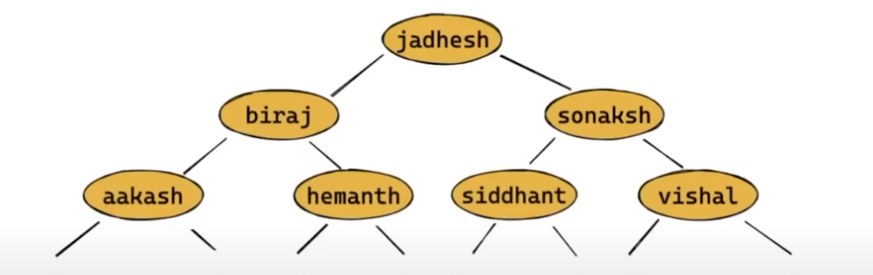

1. The word "Binary" indicates that each "node" in the tree can have at most 2 children (left or right)
2. Nodes can have 0, 1 or 2 children. 
3. Top Node is called Root.

But the type of Binary Tree that we want is <font size="4">Balanced Binary Tree</font> as shown below.

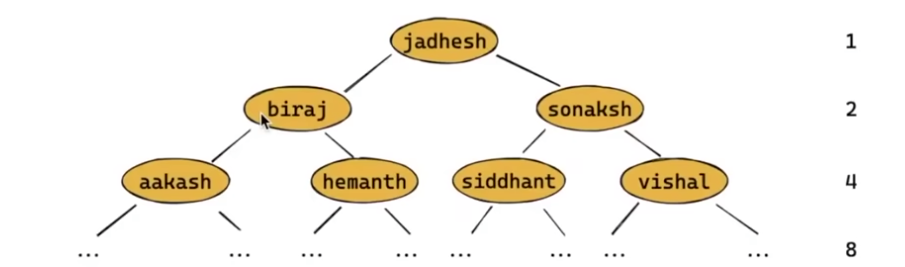

1. In this Binary tree the Root Node is the center of our list.
2. This will avoid having a Binary Tree that is heavily loaded on side of the Root Node.
3. When we store the Key and Value in the Nodes, it is called a **map** or a **treemap**.

<font size="4">Height of the Tree</font> is one of the important property

If we have a tree of height ```k```, here's a list of the number of nodes at each level:
Level 0: ```1```
Level 1: ```2```
Level 2: ```4``` i.e ```2^2```
Level 3: ```8``` i.e ```2^3```
.....
Level k-1: ```2^(k-1)```

If the total number of nodes in the tree is ```N```, then it follows that:
```N = 1 + 2^1 + 2^2 + 2^3 + ....... + 2^(k-1)``` Now we apply the reduction rule of math.

```N  + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ....... + 2^(k-1)``` where 1 + 1 = 2^1

```N  + 1 = 2^1 + 2^1 + 2^2 + 2^3 + ....... + 2^(k-1)``` where 2^1 + 2^1 = 2^2

```N  + 1 = 2^2 + 2^2 + 2^3 + ....... + 2^(k-1)``` where 2^2 + 2^2 = 2^3

```N  + 1 = 2^3 + 2^3 + ....... + 2^(k-1)``` if we keep applying this reduction we get the following

```N  + 1 = 2^(k-1) + 2^(k-1)```

```N  + 1 = 2^k```

```k = log(N+1)```

```k = log(N+1) <= log(N) + 1``` using approximation method

Thus, to store ```N``` records we require a balanced binary tree (BST) of height no larger than ```log(N) + 1```.

<font size="3">**QUESTION 2:**</font>

Implement Binary Search Tree in Python

In [100]:
class TreeNode:
    # Constructor
    def __init__(self,key):
        self.key = key
        self.left = None
        self.right = None

In [103]:
# Now we create three nodes using the TreeNode class
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

In [104]:
# We can verify that the node0 is an object of the TreeNode class
node0

In [105]:
node0.key

3

In [106]:
# Now we can connect the node1 and node2 as the left and right children of node0
node0.left = node1
node0.right = node2

In [110]:
# Now you can check the left and right of node0
print(node0.left.key)
print(node0.right.key)

4
5


**After running the above code we have created a simple Binary Tree like this:**

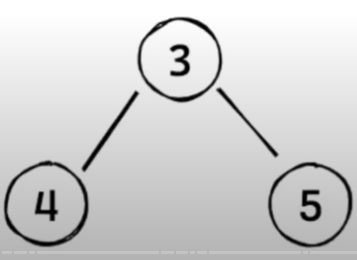

In [114]:
# Now we can create a Root Node and connect the node0 to this root node
tree = node0

In [118]:
print(tree.key)
print(tree.left.key)
print(tree.right.key)

3
4
5


<font size="3">Going Forward we will use "tree" as our root node</font>

<font size="3"> **Exercise:** </font> Create the following Binary Tree using the ```TreeNode``` class define above

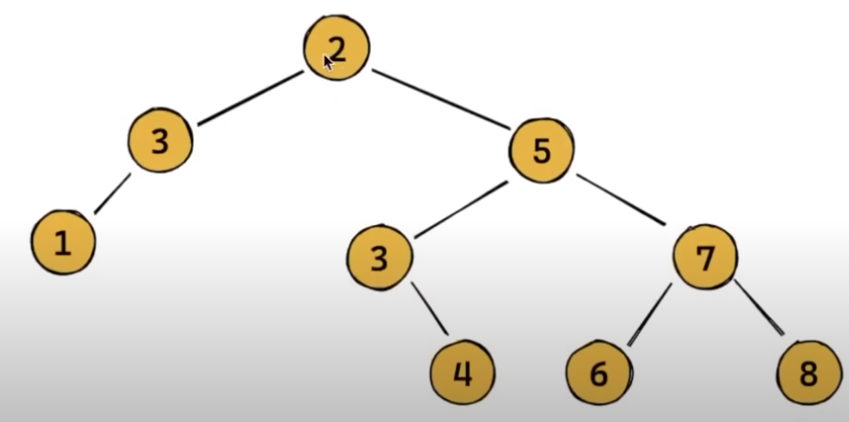

In [119]:
node1 = TreeNode(1)
node2 = TreeNode(2)
node3 = TreeNode(3)
node4 = TreeNode(4)
node5 = TreeNode(5)
node6 = TreeNode(6)
node7 = TreeNode(7)
node8 = TreeNode(8)

In [120]:
tree = node2
node2.left = node3
node3.left = node1
node2.right = node5
node5.left = node3
node3.right = node4
node5.right = node7
node7.left = node6
node7.right = node8


In [125]:
print(tree.key)
print(tree.left.key)
print(tree.right.left.key)
print(tree.right.right.left.key)

2
3
3
6


It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure (```left_subtree```, ```key```, ```right_subtree```) into a Binary Tree. Where ```left_subtree``` and ```right_subtree``` are also tuples.

In [133]:
tree_tuple = ((1,3,None),2,((None, 3,4),5,(6,7,8)))

In [138]:
def parse_tuple(data):
    print(data)
    # isinstance  returns True if the object is an instance of specified class. In our case data needs to be of type tuple.
    if isinstance(data,tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0]) # This is a recursive call.
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data) # This function will be called whem we reach the leaf nodes and a node will be created.
    return node

In [139]:
tree2 = parse_tuple(tree_tuple)

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
(1, 3, None)
1
None
((None, 3, 4), 5, (6, 7, 8))
(None, 3, 4)
None
4
(6, 7, 8)
6
8


<font size="3">**Exercise:**</font> Define a function ```tree_to_tuple``` that converts a Binary Tree into a tuple representing the same tree.

In [373]:
def tree_to_tuple(node):
    if isinstance(node , TreeNode):
        if node.left is None and node.right is None:
            return node.key
        return (tree_to_tuple(node.left), node.key, tree_to_tuple(node.right))

In [374]:
tree_to_tuple(tree2)

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

Write a helper function to display the tree in a Tree like structure

In [396]:
def display_keys(node, space='\t', level=0):
    # If the node is empty
    if node is None:
        print(space*level, '∅')
        return
    
    # If the node is a leaf node
    if node.left is None and node.right is None:
        print(space*level, str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level, node.key)
    display_keys(node.left, space, level+1)

In [397]:
display_keys(tree2)

			 8
		 7
			 6
	 5
			 4
		 3
			 ∅
 2
		 ∅
	 3
		 1


<font size="4">**Traversing a Binary Tree**</font>

<font size="3">**Question 3:**</font> Write a function to perform the ```inorder``` traversal of a Binary Tree.
<font size="3">**Question 4:**</font> Write a function to perform the ```preorder``` traversal of a Binary Tree.
<font size="3">**Question 5:**</font> Write a function to perform the ```postorder``` traversal of a Binary Tree.

A ```traversal``` refers to the process of visiting each node of a tree exactly once. Visiting a node generally refers to adding the node's key to a list. 

<font size="2">**Inorder Traversal**</font>

1. Traverse the left subtree recursively inorder.
2. Traverse the current node.
3. Traverse the right subtree recursively inorder.
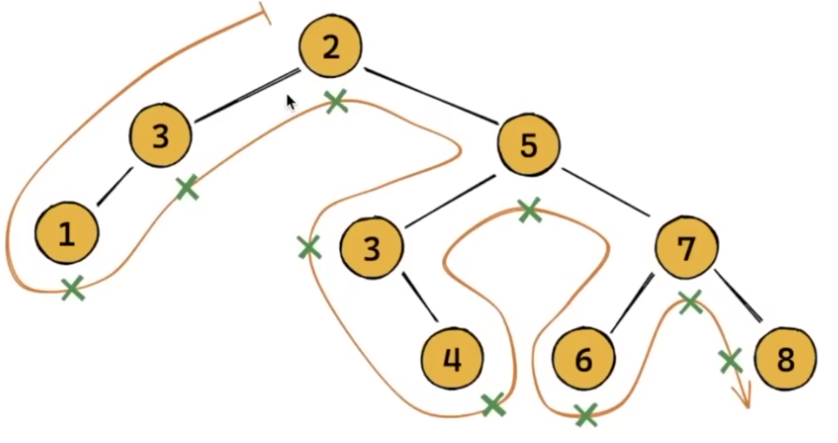

<font size="2">**Preorder Traversal**</font>

1. Traverse the current node.
2. Traverse the left subtree recursively preorder.
3. Traverse the right subtree recursively preorder.

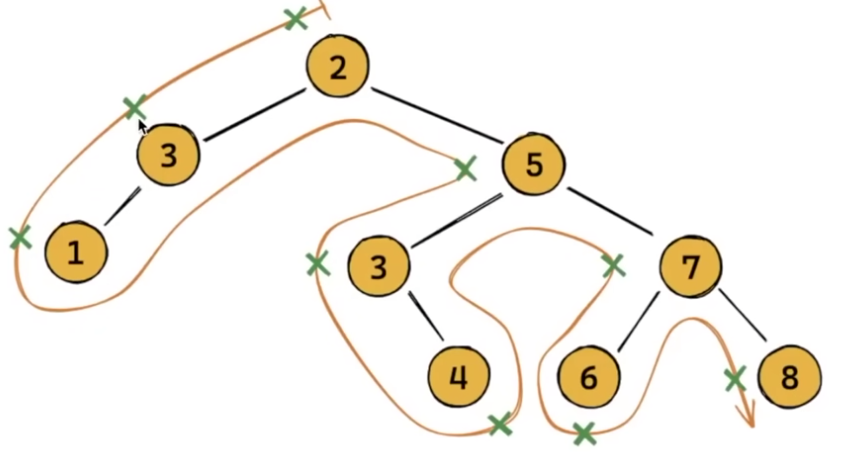

<font size="2">**Postorder Traversal**</font>

1. Traverse the left subtree recursively postorder.
2. Traverse the right subtree recursively postorder.
3. Traverse the current node.


In [398]:
def traverse_in_order(node):
    if node is None:
        return []
    return (traverse_in_order(node.left) + [node.key] + traverse_in_order(node.right))

In [399]:
traverse_in_order(tree2)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [402]:
def traverse_pre_order(node):
    if node is None:
        return []
    return ([node.key] + traverse_pre_order(node.left) + traverse_pre_order(node.right))

In [403]:
traverse_pre_order(tree2)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

In [404]:
def traverse_post_order(node):
    if node is None:
        return []
    return (traverse_post_order(node.left) + traverse_post_order(node.right) + [node.key])

In [406]:
traverse_post_order(tree2)

[1, 3, 4, 3, 6, 8, 7, 5, 2]

<font size = "4">**Height and Size of a Binary Tree**</font>

<font size="3">**Question 6:**</font> Write a function to calculate the height/depth of a binary tree.

<font size="3">**Question 7:**</font> Write a function to count the number of nodes in a binary tree.

In [409]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [410]:
tree_height(tree2)

4

In [412]:
def tree_node_count(node):
    if node is None:
        return 0
    return 1 + tree_node_count(node.left) + tree_node_count(node.right)

In [413]:
tree_node_count(tree2)

9

**As a Final Step, let's compile all the functions we've written so far as methods withing the ```TreeNode``` class itself. This is called ```Encapsulation``` od data and functionality within the same class. One of the best practice of good programming.**

In [415]:
class TreeNode():
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
    
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)
    
    def traverse_in_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_in_order(self.left) + [self.key] + TreeNode.traverse_in_order(self.right))
    
    def traverse_pre_order(self):
        if self is None:
            return []
        return ([self.key] + TreeNode.traverse_pre_order(self.left) + TreeNode.traverse_pre_order(self.right)) 
    
    def traverse_post_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_post_order(self.left) + TreeNode.traverse_post_order(self.right) + [self.key])
    
    def parse_tuple(data):
        if data is None:
            node = None
        elif isinstance(data, tuple) and len(data) == 3:
            node = TreeNode(data[1])
            node.left = TreeNode.parse_tuple(data[0])
            node.right = TreeNode.parse_tuple(data[2])
        else:
            node = TreeNode(data)
        return node
    
    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return (TreeNode.to_tuple(self.left), self.key, TreeNode.to_tuple(self.right))
    
    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def __repr__(self) -> str:
        return "BinaryTree <{}>".format(self.to_tuple())
        


In [416]:
tree_tuple2 = ((1,3,None),2,((None, 3,4),5,(6,7,8)))

In [423]:
tree3 = TreeNode.parse_tuple(tree_tuple2)
print(tree3)
print(TreeNode.height(tree3))
print(TreeNode.size(tree3))
print(TreeNode.traverse_in_order(tree3))
print(TreeNode.traverse_pre_order(tree3))
print(TreeNode.traverse_post_order(tree3))

BinaryTree <((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))>
4
9
[1, 3, 2, 3, 4, 5, 6, 7, 8]
[2, 3, 1, 5, 3, 4, 7, 6, 8]
[1, 3, 4, 3, 6, 8, 7, 5, 2]


<font size="4">**Binary Search Tree**</font>

A Binary Search Tree is a binary tree that satisfies the following conditions:

1. The ```left subtree``` of any node only contains nodes with keys less than the node's key.
2. The ```right subtree``` of any node only contains nodes with keys greater than the node's key.

<font size="3">**Question 8:**</font> Write a function to check if a binary tree is a BST.

<font size="3">**Question 9:**</font> Write a function to find the maximum key in a binary tree.

<font size="3">**Question 10:**</font> Write a function to find the minimum key in a binary tree.

In [446]:
def is_bst(node):
    if node is None:
        return True, None, None
    
    is_bst_left, min_left, max_left = is_bst(node.left)
    print("going left ",node.left ,is_bst_left, min_left, max_left)
    is_bst_right, min_right, max_right = is_bst(node.right)
    print("going right ",node.right ,is_bst_right, min_right, max_right)

    is_bst_node = (is_bst_left and is_bst_right and (max_left is None or max_left < node.key) and (min_right is None or min_right > node.key))

    min_node = min(node.key, min_left or node.key, min_right or node.key)
    max_node = max(node.key, max_left or node.key, max_right or node.key)
    print(is_bst_node, min_node, max_node)
    return is_bst_node, min_node, max_node

In [447]:
is_bst(tree3)

going left  None True None None
going right  None True None None
True 1 1
going left  BinaryTree <1> True 1 1
going right  None True None None
True 1 3
going left  BinaryTree <(1, 3, None)> True 1 3
going left  None True None None
going left  None True None None
going right  None True None None
True 4 4
going right  BinaryTree <4> True 4 4
True 3 4
going left  BinaryTree <(None, 3, 4)> True 3 4
going left  None True None None
going right  None True None None
True 6 6
going left  BinaryTree <6> True 6 6
going left  None True None None
going right  None True None None
True 8 8
going right  BinaryTree <8> True 8 8
True 6 8
going right  BinaryTree <(6, 7, 8)> True 6 8
True 3 8
going right  BinaryTree <((None, 3, 4), 5, (6, 7, 8))> True 3 8
False 1 8


(False, 1, 8)